<h1 align='center'; color ='blue'><b><font color='pickle'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='pickle'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe. 

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [2]:
# import libraries and setup directory
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/ColabNotebooks/NLPClass/'
base_folder = Path(base_path)
data_folder = base_folder/'datasets'

Mounted at /content/drive


In [3]:
# import data into a dataframe
df = pd.read_csv(data_folder/'spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = df[['v1', 'v2']]
data = data.rename({'v1':'label','v2':'X'}, axis=1)
data.label.value_counts()*100/len(data.label)

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [5]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# <font color='pickle'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

Ans : I would use F1-score as the model performance metric. Since Accuracy is not the right metric. I have Precision and Recall as my options. Precision will be the measure of how many spam are correctly classified. Recall will be the measure of how many of spam classifications are correct. I would need a combination of these 2 so I would go with F1 score.



# <font color='pickle'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model. 

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:** 

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/). 

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.). 

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn: 

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

In [8]:
data_1 = train_smaller = data.sample(frac=0.1, replace=False, random_state=1)
data_1.shape

(557, 2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_1.X, data_1.label, test_size=0.3, random_state=42)

In [11]:
print(f'Shape of Training data set is : {X_train.shape}')
print(f'Shape of Test data set is : {X_test.shape}')

Shape of Training data set is : (389,)
Shape of Test data set is : (168,)


## <font color ='pickle'>**PreProcessing**

In [12]:
model_folder = base_folder/'models/imdb'
custom_functions = base_folder/'custom-functions'

In [ ]:
!python -m spacy download 'en_core_web_sm'

In [14]:
import sys
sys.path.append('/content/drive/MyDrive/ColabNotebooks/NLPClass/custom-functions')

In [ ]:
sys.path

In [16]:
import custom_preprocessor as cp
from  featurizer import ManualFeatures
from  plot_learning_curve import plot_learning_curve

In [18]:
X_train_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(X_train.values)

In [19]:
X_train_cleaned_sparse_embed = data_folder / 'x_train_cleaned_sparse_embed.pkl'

In [ ]:
import joblib
joblib.dump(X_train_cleaned, X_train_cleaned_sparse_embed)

In [22]:
X_test_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(X_test.values)

In [23]:
X_test_cleaned_sparse_embed = data_folder / 'x_test_cleaned_sparse_embed.pkl'
joblib.dump(X_test_cleaned, X_test_cleaned_sparse_embed)

['/content/drive/MyDrive/ColabNotebooks/NLPClass/datasets/x_test_cleaned_sparse_embed.pkl']

## <font color ='pickle'>**Pipeline 1: Data Preprocessing + Sparse Embeddings (TF-IDF) + ML Model**

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

classifier_1a = Pipeline([('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
                         ('classifier', LogisticRegression(max_iter = 10000)),
                        ])

In [30]:
param_grid_classifier_1a = {'vectorizer__max_features': [100, 500, 1000, 2000, 5000],
                           'classifier__C': [ 0.1, 1, 10, 100, 100000]}

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from  sklearn.compose import ColumnTransformer

grid_classifier_1a = GridSearchCV(estimator=classifier_1a, param_grid=param_grid_classifier_1a, cv = 3)

In [32]:
# Fit the model on training data
X_trained_cleaned = joblib.load(X_train_cleaned_sparse_embed)
grid_classifier_1a.fit(X_trained_cleaned, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(token_pattern='[\\S]+')),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100, 100000],
                         'vectorizer__max_features': [100, 500, 1000, 2000,
                                                      5000]})

In [33]:
print(f'Best cross-validation score: {grid_classifier_1a.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1a.best_params_)
print("\nBest estimator: ", grid_classifier_1a.best_estimator_)

Best cross-validation score: 0.97

Best parameters:  {'classifier__C': 100, 'vectorizer__max_features': 1000}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=1000, token_pattern='[\\S]+')),
                ('classifier', LogisticRegression(C=100, max_iter=10000))])


In [34]:
file_model_sparse_embed = model_folder / 'sparse_embed_model.pkl'
joblib.dump(grid_classifier_1a.best_estimator_, file_model_sparse_embed)

['/content/drive/MyDrive/ColabNotebooks/NLPClass/models/imdb/sparse_embed_model.pkl']

In [35]:
# load the saved model
loaded_model_sparse_embed = joblib.load(file_model_sparse_embed)

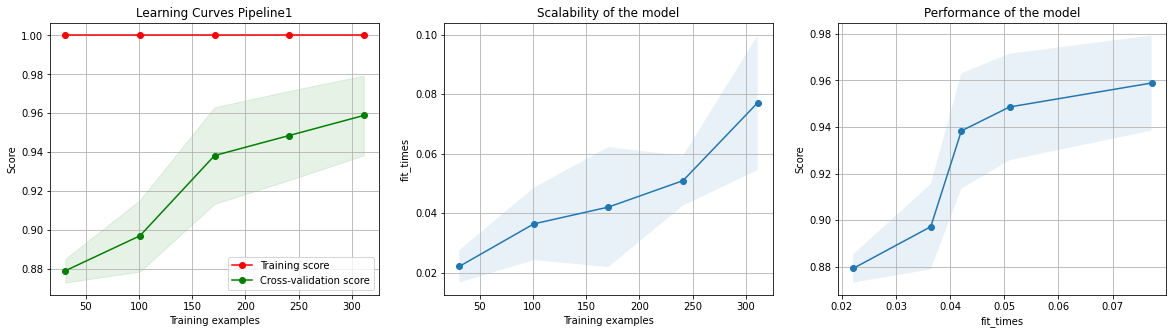

In [37]:
# plot learning curces
# This cell can take upto 30 minutes to run
import matplotlib.pyplot as plt
plot_learning_curve(loaded_model_sparse_embed, 'Learning Curves Pipeline1', X_train_cleaned, y_train)
plt.show()

In [38]:
# Accuracy on Train data set
grid_classifier_sparse_embed = loaded_model_sparse_embed.score(X_train_cleaned, y_train)
print(f'Accuracy on train set  is {grid_classifier_sparse_embed}')

Accuracy on train set  is 1.0


In [39]:
# Final Pipeline
def final_pipeline(text):
  # cleaned_text = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(text)
  cleaned_text = joblib.load(X_test_cleaned_sparse_embed)
  predictions = loaded_model_sparse_embed.predict(cleaned_text)
  return predictions

In [40]:
# predicted values for Test data set
y_test_pred = final_pipeline(X_test)

In [41]:
print('\nTest set classification report:\n\n',classification_report(y_test, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

         ham       0.94      1.00      0.97       147
        spam       1.00      0.57      0.73        21

    accuracy                           0.95       168
   macro avg       0.97      0.79      0.85       168
weighted avg       0.95      0.95      0.94       168



## <font color ='pickle'>**Pipeline 2: Data Preprocessing + Manual Features + ML Model pipeline**

In [44]:
ManualFeatures??

In [43]:
featurizer =  ManualFeatures(spacy_model='en_core_web_sm')
featurizer

ManualFeatures(spacy_model='en_core_web_sm')

In [70]:
type(X_train)

pandas.core.series.Series

In [47]:
X_train_features, feature_names = featurizer.fit_transform(X_train.values)

In [50]:
X_train_features

array([[ 13.,  68.,  56., ...,   0.,   3.,   0.],
       [  6.,  29.,  24., ...,   0.,   1.,   1.],
       [  8.,  43.,  36., ...,   0.,   1.,   0.],
       ...,
       [  9.,  37.,  29., ...,   0.,   3.,   0.],
       [ 28., 131., 104., ...,   4.,   5.,   1.],
       [  9.,  50.,  42., ...,   1.,   3.,   1.]])

In [51]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_digits',
 'count_numbers',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

In [52]:
classifier_1b = Pipeline([('classifier', LogisticRegression(max_iter = 10000)),])
param_grid_classifier_1b = {'classifier__C': [0.01, 10, 1000, 100000]}

In [53]:
grid_classifier_1b = GridSearchCV(estimator=classifier_1b, param_grid=param_grid_classifier_1b, cv = 3)

In [54]:
grid_classifier_1b.fit(X_train_features, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.01, 10, 1000, 100000]})

In [55]:
print("Best cross-validation score: {:.2f}".format(grid_classifier_1b.best_score_))
print("\nBest parameters: ", grid_classifier_1b.best_params_)
print("\nBest estimator: ", grid_classifier_1b.best_estimator_)

Best cross-validation score: 0.97

Best parameters:  {'classifier__C': 10}

Best estimator:  Pipeline(steps=[('classifier', LogisticRegression(C=10, max_iter=10000))])


In [56]:
file_model_features = model_folder / 'features_model.pkl'

In [57]:
joblib.dump(grid_classifier_1b.best_estimator_, file_model_features)

['/content/drive/MyDrive/ColabNotebooks/NLPClass/models/imdb/features_model.pkl']

In [58]:
# load the saved model
loaded_final_model_features = joblib.load(file_model_features)

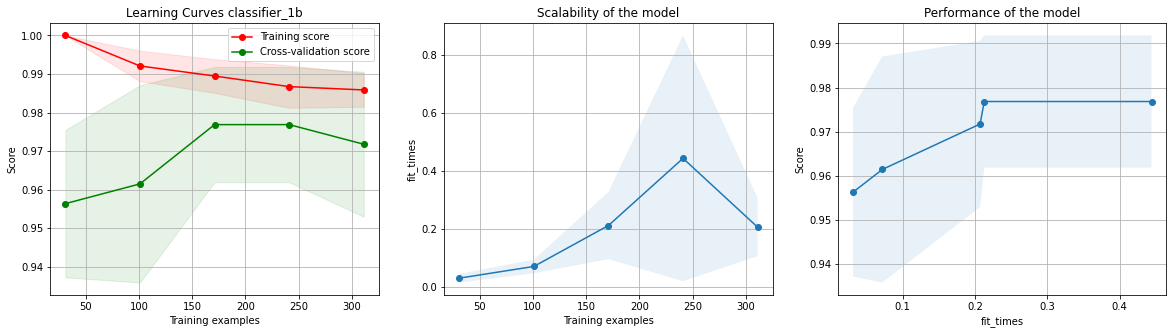

In [59]:
# plot learning curces
# This cell can take upto 30 minutes to run
plot_learning_curve(loaded_final_model_features, 'Learning Curves classifier_1b', X_train_features, y_train)
plt.show()

In [60]:
# Accuracy on Train data set
grid_classifier_sparse_embed = loaded_final_model_features.score(X_train_features, y_train)
print(f'Accuracy on train set  is {grid_classifier_sparse_embed}')

Accuracy on train set  is 0.9845758354755784


In [77]:
type(X_test)

pandas.core.series.Series

In [80]:
# Final Pipeline
def final_pipeline():
  test_features, feature_names = featurizer.fit_transform(X_test.values)
  predictions = loaded_final_model_features.predict(test_features)
  return predictions

In [ ]:
# predicted values for Test data set
y_test_pred = final_pipeline()

In [ ]:
print('\nTest set classification report:\n\n',classification_report(y_test, y_test_pred ))

## <font color ='pickle'>**Pipeline 3: Combine Manual Features and TfID vectors**